#Juros Simples e Juros Compostos

Um dos principais conceitos apresentados pela Engenharia Econômica é entender que o dinheiro tem um custo associado ao tempo, isto é, uma unidade monetária em um período (valor em determinado momento do tempo) não é diretamente comparável a outra unidade monetária em outro momento. Alguns Fatores que influenciam a correção monetária temporal, são:

* Inflação
* Inadimplência
* Custo de Oportunidade
* Investimentos futuros

Para entender o funcionamento de fluxos monetários ao longo do tempo podemos utilizar o conceito de juros.

Juros são ativos financeiros que são recebidos pela ação de emprestar um determinado montante em dinheiro a um determinado período (lê-se tempo/período de capitalização). Os tipos clássicos de juros são: Simples e Compostos. 

###Juros Simples

Juros Simples são definidos como os juros aplicados a um montante inicial fixo ao longo do tempo. O valor final da aplicação (lê-se valor futuro) é representado pelo produto entre o montante inicial (valor presente) pela taxa de rendimento e período de capitalização. 

Exemplo 1: Imagine que uma instituição financeira apresente um empréstimo no regime de juros simples. O valor máximo oferecido é de R$ 50.000,00 a uma taxa de 5.0 % a.a e prazo de quitação de 5 anos. Qual o valor do juros e montante final pago ? 

In [ ]:
def juros_simples(vp, i, n):
  '''
  vp: Valor Presente (Montante inicial)
  i: taxa de capitalização
  n: período de capitalização
  '''

  js = vp * i * n
  return round(js, 2)

In [ ]:
juros_simples = juros_simples(50000, 0.05, 5)
juros_simples

12500.0

In [ ]:
#Valor futuro do empréstimo
valor_futuro = 50000.0 + juros_simples
valor_futuro

62500.0

Podemos calcular diretamente o valor futuro recebido por juros simples como: VF = VP * (1 + i * n)

In [ ]:
def vl_futuro_simples(vp, i, n):
  '''
  vp: Valor Presente (Montante inicial)
  i: taxa de capitalização
  n: período de capitalização'''
  
  vfs = vp*(1 + i * n)

  return print(f'Valor futuro R${round(vfs, 2)}')

In [ ]:
vl_futuro_simples(50000.0, 0.05, 5)

Valor futuro R$62500.0


###Juros Compostos

Os juros compostos são os tipos de juros mais utilizados. Seu funcionamento consiste em ajustar os valores de juros recebidos pelo valor inicial mais o juros recebidos no período anterior, acarretando em fluxo acumulativo de rendimento. 

O valor futuro de um rendimento que utiliza-se de juros compostos, popularmente conhecido como *juros sobre juros*, apresenta a seguinte memória de cálculo: VF = VP * (1 + i) ** n


Exemplo 2: Um cliente do Banco XYZ aplica R$5000.00 em um CDB que possui um regime de capitalização baseados em juros compostos. A taxa de rendimento é 2.0% a.m em um período de 10 meses. Qual será o valor futuro e juros dessa aplicação ?

In [ ]:
def vl_futuro_liquido(vp, i, n):
  '''
  vp: Valor Presente (Montante inicial)
  i: taxa de capitalização
  n: período de capitalização
  '''
  vfl = vp * (1 + i)** n
  return round(vfl, 2)

In [ ]:
vl_futuro_liquido = vl_futuro_liquido(5000.0, 0.02, 10)
vl_futuro_liquido

6094.97

In [ ]:
#podemos calcular o juros recebido por: J = VF- VP

J = vl_futuro_liquido - 5000.0
print(f'Juros recebido R${round(J,2)}')

Juros recebido R$1094.97


É importante destacar que para os cálculos tanto para juros simples quanto compostos, a taxa e o período de campitalização devem estar na mesma ordem de grandeza, isto é, suas unidades devem ser as mesma (ano, mês, dia, semestre, etc). 

Como converter uma taxa de 2.5% a.m para uma taxa anual ?

In [ ]:
def conv_tx_composta(i, tp_entrada= 'a', tp_conversao= 'm'):
  
  if tp_entrada == 'a' and tp_conversao == 'm':
    tx_final = (1 + i)**(1/12) -1
    return print(f'A taxa mensal é de {round(tx_final*100, 2)}% a.a')

  elif tp_entrada == 'm' and tp_conversao == 'a':
    tx_final = (1 + i)**(1/12) - 1
    return print(f'A taxa anual é de {round(tx_final*100, 2)}% a.a')

In [ ]:
conv_tx_composta(0.025, 'm', 'a')

A taxa anual é de 0.21% a.a


###Comparação entre Juros Simples e Juros Compostos

Vamos comparar o seguinte case: Você deseja aplicar R$ 100.000,00 a uma taxa de 9.0% a.a. O Banco XYZ apresenta um CDB em regime de capitalização simples e o Banco ZYX possui um CDB no regime de capitalização composta. Qual aplicação lhe dará o maior retorno nos próximos 10 anos?

Para identificar qual aplicação apresentará maior retorno, iremos criar duas funções em Python que irá calcular o valores futuros mensais dos dois regimes de capitalização. Posteriormente, plotaremos um gráfico que exibirá o comportamento dos juros. Para realização desses recursos será necessário utilizarmos algumas bibliotecas como pandas, numpy e  matplotlib.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#criação do array que terá os dados do período(meses).
periodo = np.linspace(1, 10, 10, dtype=int)

In [ ]:
#criando uma função terá os rendimentos dos 24 meses no regimento simples
def vl_futuro_simples(vp, i, n):
  '''
  vp: Valor Presente (Montante inicial)
  i: taxa de capitalização
  n: período de capitalização'''

  vfl= vp * (1 + i * n)

  return vfl

In [ ]:
vl_futuro_simples(100000, 0.09, periodo)

array([109000., 118000., 127000., 136000., 145000., 154000., 163000.,
       172000., 181000., 190000., 199000., 208000., 217000., 226000.,
       235000., 244000., 253000., 262000., 271000., 280000., 289000.,
       298000., 307000., 316000.])

In [ ]:
#criando uma função que irá calcular os rendimentos dos 24 meses no regimento composto
def vl_futuro_composto(vp, i, n):
  '''
  vp: Valor Presente (Montante inicial)
  i: taxa de capitalização
  n: período de capitalização'''

  vfl= vp * np.power((1 + i), periodo)

  return vfl

In [ ]:
vl_futuro_composto(100000, 0.09, periodo)

array([109000.        , 118810.        , 129502.9       , 141158.161     ,
       153862.39549   , 167710.0110841 , 182803.91208167, 199256.26416902,
       217189.32794423, 236736.36745921, 258042.64053054, 281266.47817829,
       306580.46121434, 334172.70272363, 364248.24596875, 397030.58810594,
       432763.34103547, 471712.04172867, 514166.12548425, 560441.07677783,
       610880.77368783, 665860.04331974, 725787.44721852, 791108.31746818])

Inicialmente criaremos um dataframe **aplicacao** que vão receber as colunas: Período, Juros Simples, Juros Compostos.

In [ ]:
data = {'Período': periodo, 'JurosSimples':vl_futuro_simples(100000, 0.09, periodo), 'JurosCompostos': vl_futuro_composto(100000, 0.09, periodo)}

In [ ]:
aplicacao = pd.DataFrame(data=data)

In [ ]:
aplicacao

,Período,JurosSimples,JurosCompostos
0,1,109000.0,109000.000000
1,2,118000.0,118810.000000
2,3,127000.0,129502.900000
3,4,136000.0,141158.161000
4,5,145000.0,153862.395490
5,6,154000.0,167710.011084
6,7,163000.0,182803.912082
7,8,172000.0,199256.264169
8,9,181000.0,217189.327944
9,10,190000.0,236736.367459


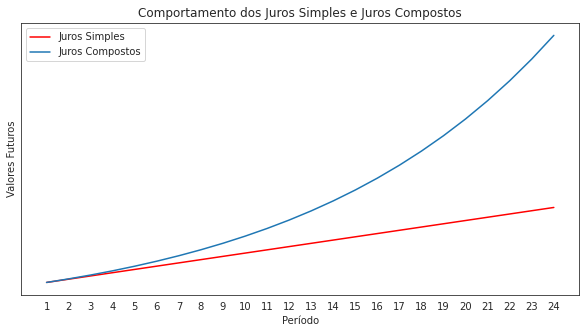

In [ ]:
#Plotando gráfico.
sns.set_style("white")
plt.figure(figsize=(10, 5))
plt.title('Comportamento dos Juros Simples e Juros Compostos')

interest = sns.lineplot(x= 'Período', y= 'JurosSimples', data= aplicacao, label='Juros Simples', color='red')
interest = sns.lineplot(x= 'Período', y= 'JurosCompostos', data= aplicacao, label= 'Juros Compostos')

interest.set_ylabel('Valores Futuros')
plt.xticks(periodo)
plt.yticks([])
plt.show()

Portanto, podemos observar que a aplicação do Banco ZYX, em regime de capitalização composta, apresenta maior rentabilidade em comparação a aplicação de juros simples.

O modelo de capitalização composta é aplicado em diversos segmentos do mercado financeiro devido a possuir um comportamento superior a longo prazo dos títulos do que aqueles baseados em juros simples. 